# import modules

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D

# helper functions

In [2]:
def CNN_model(num_classes):
    model = Sequential()
    model.add(Conv2D(filters = 32,
                     kernel_size = (5, 5),
                     padding = "valid",
                     input_shape = (32, 32, 1),
                     data_format = "channels_last",
                     activation = "relu"))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(rate = 0.1))
    model.add(Flatten())
    model.add(Dense(units=128, activation = "relu"))
    model.add(Dense(units = num_classes, activation = "softmax"))
    
    optimizer = Adam(learning_rate=.0001)

    model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

    return model

# read in training data 

In [3]:
train_df = pd.read_csv('train.csv', delimiter=',')

# visualize sampling of training data

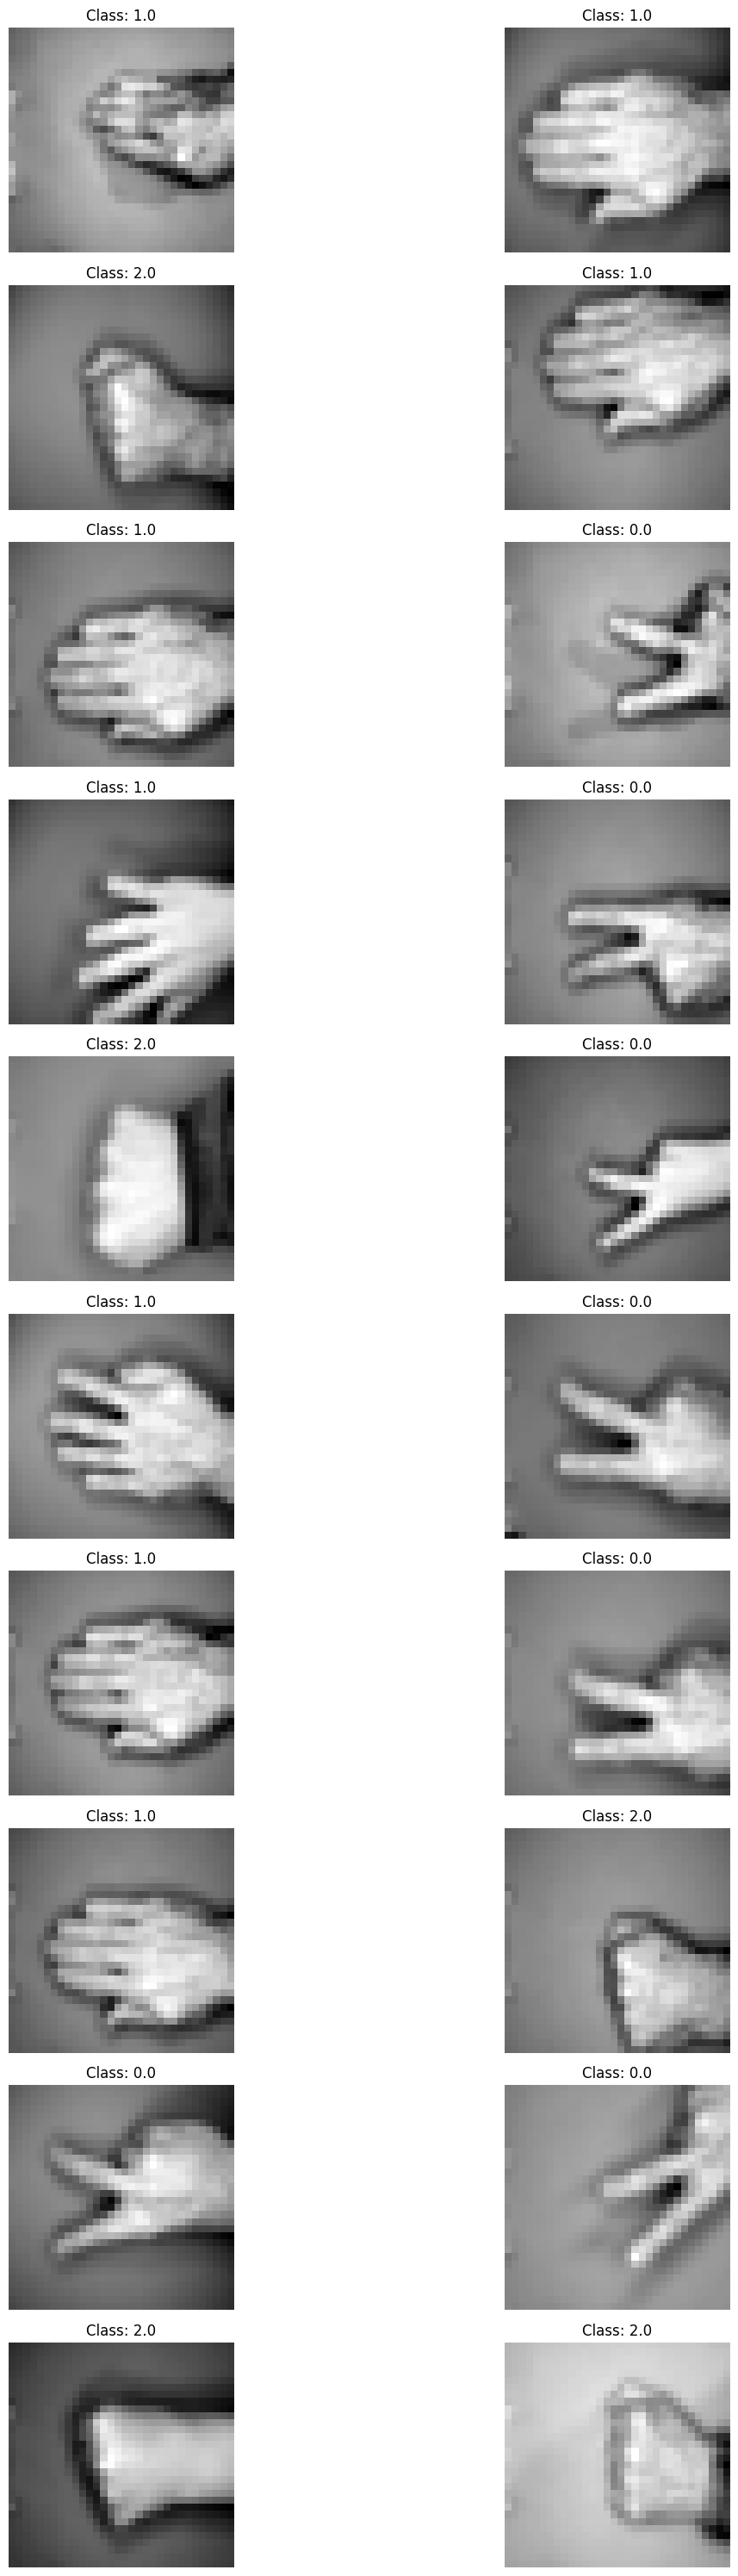

In [4]:
num_images_to_plot = 20

pixel_columns = train_df.columns[:-1]
pixels = train_df[pixel_columns].values.astype(float)  
classes = train_df['class'].values

image_size = int(np.sqrt(len(pixel_columns)))
images = pixels.reshape(-1, image_size, image_size)
num_rows = int(np.ceil(num_images_to_plot / 2))
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 3*num_rows))

for i in range(num_images_to_plot):
    row = i // 2  
    col = i % 2
    axes[row, col].imshow(images[i], cmap='gray')
    axes[row, col].set_title(f'Class: {classes[i]}') #Doesnt work unless formated (f''), not sure why
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# process training data 

In [5]:
X_train = train_df.drop(columns=['class']).values.astype(float) / 255.0
y_train = train_df['class']

unique_classes = np.unique(y_train)
num_classes = len(unique_classes)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
X_train = X_train.reshape(-1, image_size, image_size, 1)

# train classification model

In [6]:
f_cnn = CNN_model(num_classes)
f_cnn.fit(X_train, y_train, epochs=600, batch_size=20)

Epoch 1/600
88/88 [==============================] - 1s 9ms/step - loss: 1.0986 - accuracy: 0.3183
Epoch 2/600
88/88 [==============================] - 1s 8ms/step - loss: 1.0985 - accuracy: 0.3663
Epoch 3/600
88/88 [==============================] - 1s 7ms/step - loss: 1.0982 - accuracy: 0.3709
Epoch 4/600
88/88 [==============================] - 1s 8ms/step - loss: 1.0977 - accuracy: 0.3726
Epoch 5/600
88/88 [==============================] - 1s 7ms/step - loss: 1.0973 - accuracy: 0.4137
Epoch 6/600
88/88 [==============================] - 1s 11ms/step - loss: 1.0959 - accuracy: 0.5103
Epoch 7/600
88/88 [==============================] - 1s 10ms/step - loss: 1.0943 - accuracy: 0.4377
Epoch 8/600
88/88 [==============================] - 1s 10ms/step - loss: 1.0927 - accuracy: 0.4520
Epoch 9/600
88/88 [==============================] - 1s 8ms/step - loss: 1.0897 - accuracy: 0.4646
Epoch 10/600
88/88 [==============================] - 1s 8ms/step - loss: 1.0857 - accuracy: 0.5103
Epoch 

# read in test data

In [7]:
test_df = pd.read_csv('test.csv', delimiter=',')

# process test data

In [8]:
X = test_df.values.astype(float) / 255.0
X = X.reshape(-1, image_size, image_size, 1)

# use trained model to predict test data

In [9]:
predictions = f_cnn.predict(X)
predicted_labels = np.argmax(predictions, axis=1)

14/14 [==============================] - 0s 7ms/step


# visualize random test samples with prediction

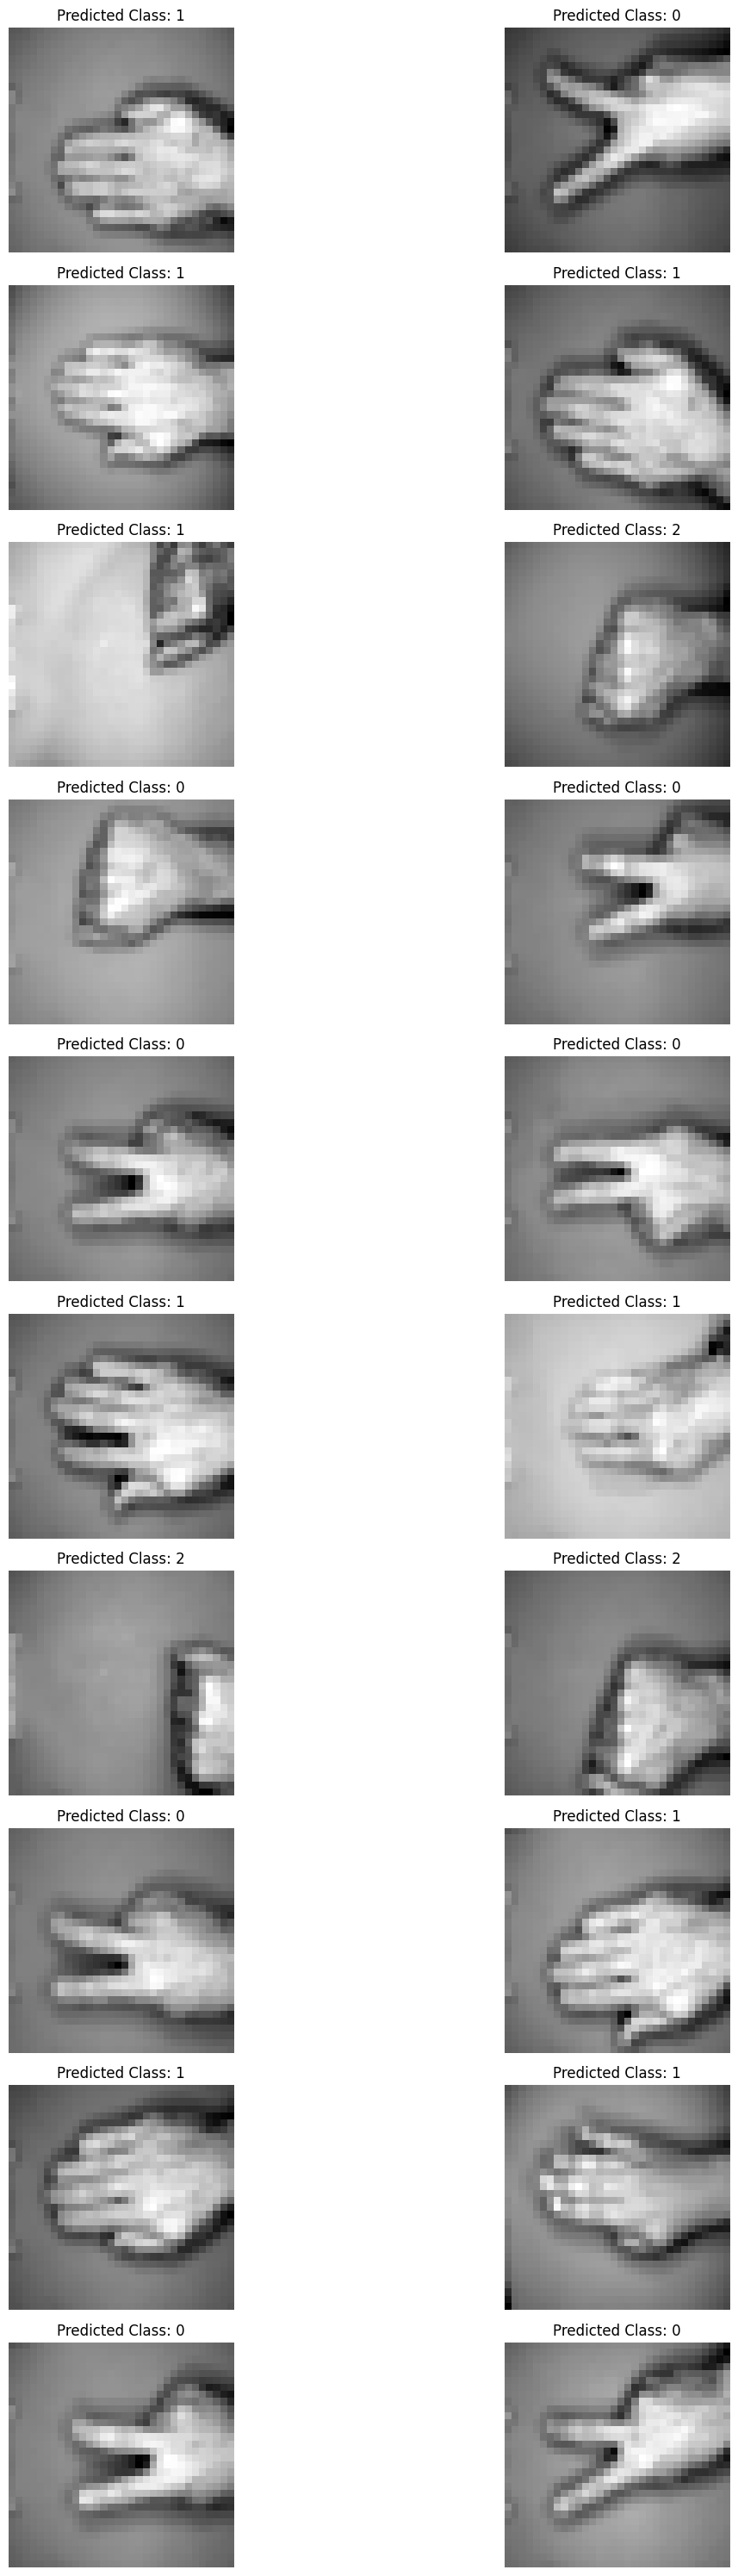

In [10]:
num_images_to_plot = 20
selected_indices = np.random.choice(len(predictions), num_images_to_plot, replace=False)
selected_images = X[selected_indices]
predicted_labels_ = np.argmax(predictions[selected_indices], axis=1)

num_rows = int(np.ceil(num_images_to_plot / 2))
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 3*num_rows))

for i in range(num_images_to_plot):
    row = i // 2  
    col = i % 2
    axes[row, col].imshow(selected_images[i].reshape(image_size, image_size), cmap='gray')
    axes[row, col].set_title(f'Predicted Class: {predicted_labels_[i]}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# write predicted test data to \<YourLastName>.csv

In [11]:
test_df['class'] = predicted_labels
test_df.to_csv('Carter.csv', index=False)